# Laboratorio 3 — Regresión

## Integrantes:
* Juan Diego Cardona    201819447
* Nicolás Ortega        201814515
* Camila Teran          201822000

## Carga de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydoc import help
from scipy.stats.stats import pearsonr
help(pearsonr)

# Composicion de pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from scipy.stats.mstats import winsorize

# Regresion lineal
from sklearn.linear_model import LinearRegression

# Importar/ Exportar modelos
from joblib import dump, load

# Metricas
from sklearn.metrics import mean_squared_error as mse

# q-q plots
import scipy.stats as stats

Help on function pearsonr in module scipy.stats.stats:

pearsonr(x, y)
    Pearson correlation coefficient and p-value for testing non-correlation.
    
    The Pearson correlation coefficient [1]_ measures the linear relationship
    between two datasets.  The calculation of the p-value relies on the
    assumption that each dataset is normally distributed.  (See Kowalski [3]_
    for a discussion of the effects of non-normality of the input on the
    distribution of the correlation coefficient.)  Like other correlation
    coefficients, this one varies between -1 and +1 with 0 implying no
    correlation. Correlations of -1 or +1 imply an exact linear relationship.
    Positive correlations imply that as x increases, so does y. Negative
    correlations imply that as x increases, y decreases.
    
    The p-value roughly indicates the probability of an uncorrelated system
    producing datasets that have a Pearson correlation at least as extreme
    as the one computed from these da

## 1. Limpieza y preparación de datos

In [2]:
df_original = pd.read_csv('datos.csv')
print(df_original.shape)
df_original.head(5)

(3238, 19)


,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,6.429631,27,10,3000,143.718,0.0035151591,0.0002196974,7,0.0001098487,0.0003923169,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.0
1,6.034862,23,10,5000,129.2322,0.0033038124,0.0002594617,4,0.0002940566,0.0004324362,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.00020757
2,5.000659,30,10,200,69.9612,0.0011010906,0.0003355705,4,0.0002936242,0.0004614094,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.00018876
3,3.264122,19,20,400,107.6016,0.0010335422,0.0002131015,1,5.32753697310659e-05,0.0005434088,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.00038358
4,3.883553,32,10,500,122.8908,0.0011360136,0.0003273259,2,0.0,0.0013285582,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,1.9254e-05


In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3238 entries, 0 to 3237
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LeagueIndex           3238 non-null   float64
 1   Age                   3238 non-null   object 
 2   HoursPerWeek          3238 non-null   object 
 3   TotalHours            3238 non-null   object 
 4   APM                   3238 non-null   object 
 5   SelectByHotkeys       3238 non-null   object 
 6   AssignToHotkeys       3238 non-null   object 
 7   UniqueHotkeys         3238 non-null   object 
 8   MinimapAttacks        3238 non-null   object 
 9   MinimapRightClicks    3238 non-null   object 
 10  NumberOfPACs          3238 non-null   float64
 11  GapBetweenPACs        3238 non-null   object 
 12  ActionLatency         3238 non-null   object 
 13  ActionsInPAC          3238 non-null   float64
 14  TotalMapExplored      3238 non-null   object 
 15  WorkersMade          

Se arregla el problema de "NA_VALUES" en las columnas que impide que se lean como numéricas

In [4]:
#Se eliminan los registro con 'NA-VALUE' y con LeagueIndex incoherentes en los datos
for col in df_original.columns:
    df_original.drop(df_original.loc[df_original[col]=='NA-VALUE'].index,inplace=True)
df_original.drop(df_original.loc[df_original["LeagueIndex"]==20].index,inplace=True)
    
df_limpio = df_original.astype('float64')
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3122 entries, 0 to 3237
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LeagueIndex           3122 non-null   float64
 1   Age                   3122 non-null   float64
 2   HoursPerWeek          3122 non-null   float64
 3   TotalHours            3122 non-null   float64
 4   APM                   3122 non-null   float64
 5   SelectByHotkeys       3122 non-null   float64
 6   AssignToHotkeys       3122 non-null   float64
 7   UniqueHotkeys         3122 non-null   float64
 8   MinimapAttacks        3122 non-null   float64
 9   MinimapRightClicks    3122 non-null   float64
 10  NumberOfPACs          3122 non-null   float64
 11  GapBetweenPACs        3122 non-null   float64
 12  ActionLatency         3122 non-null   float64
 13  ActionsInPAC          3122 non-null   float64
 14  TotalMapExplored      3122 non-null   float64
 15  WorkersMade          

In [5]:
df_limpio.describe()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000
mean,5.442499,21.681935,15.957079,984.850737,115.297676,0.004080,0.000367,4.355221,0.000095,0.000384,0.003445,40.671852,64.041259,5.276133,22.237348,0.001037,6.563421,0.000061,0.000145
std,1.938462,4.245931,12.001258,17906.147231,48.527860,0.004793,0.000210,2.337651,0.000162,0.000362,0.000976,17.235286,19.214199,1.514256,7.461685,0.000524,1.857460,0.000113,0.000270
min,0.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.632600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,4.063704,19.000000,8.000000,300.000000,80.061900,0.001256,0.000205,3.000000,0.000000,0.000141,0.002754,29.275250,50.539175,4.257175,17.000000,0.000685,5.000000,0.000000,0.000000
50%,5.589174,21.000000,12.000000,500.000000,108.011100,0.002480,0.000351,4.000000,0.000040,0.000283,0.003386,36.915400,61.119850,5.091500,22.000000,0.000907,6.000000,0.000000,0.000022
75%,6.932617,24.000000,20.000000,800.000000,141.060750,0.004975,0.000494,6.000000,0.000117,0.000510,0.004017,48.453875,73.764075,6.038100,27.000000,0.001266,8.000000,0.000090,0.000187
max,10.000000,44.000000,168.000000,1000000.000000,389.831400,0.043088,0.001648,10.000000,0.003019,0.003688,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


### Arreglando outliers con Winsorize

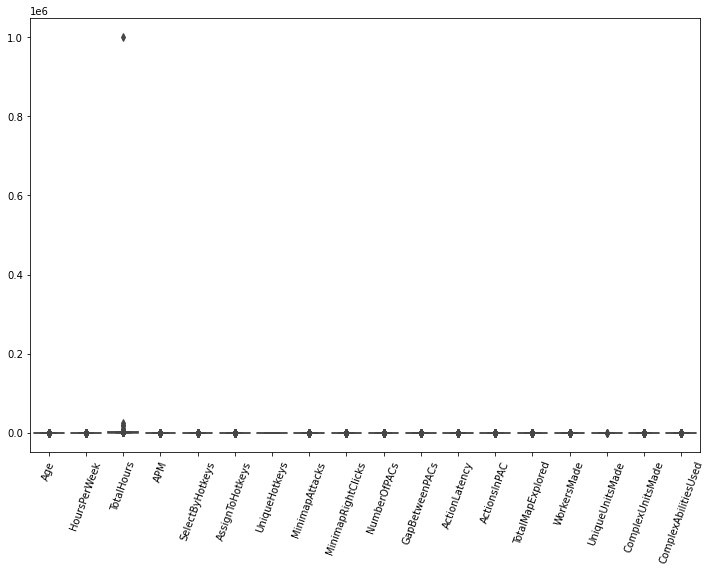

In [6]:
df_outliers = df_limpio.drop("LeagueIndex", axis=1)

fig=plt.figure(figsize=(12,8))
ax = sns.boxplot(data=df_outliers[df_outliers.columns])
d = ax.set_xticklabels(ax.get_xticklabels(),rotation = 70)

In [7]:
new_dfs = []
for col in df_outliers.columns:
    Q1 = df_outliers[col].quantile(0.25)
    Q3 = df_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR
    
    low_q = 0.01
    val1 = df_outliers[col].quantile(low_q)
    while val1 < lower_lim:
        low_q += 0.01
        val1 = df_outliers[col].quantile(low_q)
    
    upp_q = 0.99
    val2 = df_outliers[col].quantile(upp_q)
    while val2 > upper_lim:
        upp_q -= 0.01
        val2 = df_outliers[col].quantile(upp_q)
    
    df_win = winsorize(df_outliers[col], (low_q, 1-upp_q))
    df_win = pd.DataFrame(df_win.data, columns=[col])
    new_dfs.append(df_win)
df_limpio2 = pd.concat(new_dfs, axis=1)
df_limpio2

,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,27.0,10.0,1500.0,143.7180,0.003515,0.000220,7.0,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28.0,0.001397,6.0,0.0,0.000000
1,23.0,10.0,1500.0,129.2322,0.003304,0.000259,4.0,0.000270,0.000432,0.004307,32.9194,42.3454,4.8434,22.0,0.001193,5.0,0.0,0.000208
2,30.0,10.0,200.0,69.9612,0.001101,0.000336,4.0,0.000270,0.000461,0.002926,44.6475,75.3548,4.0430,22.0,0.000745,6.0,0.0,0.000189
3,19.0,20.0,400.0,107.6016,0.001034,0.000213,1.0,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19.0,0.000426,7.0,0.0,0.000384
4,30.0,10.0,500.0,122.8908,0.001136,0.000327,2.0,0.000000,0.001018,0.002368,22.6885,62.0813,8.4338,15.0,0.001174,4.0,0.0,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117,20.0,8.0,400.0,158.1390,0.009892,0.000504,7.0,0.000217,0.000313,0.003583,36.3990,66.2718,4.5097,30.0,0.001035,7.0,0.0,0.000287
3118,16.0,36.0,1500.0,186.1320,0.006951,0.000360,6.0,0.000083,0.000166,0.005414,22.8615,34.7417,4.9309,38.0,0.001343,7.0,0.0,0.000388
3119,21.0,8.0,100.0,121.6992,0.002956,0.000241,8.0,0.000055,0.000208,0.003690,35.5833,57.9585,5.4154,23.0,0.002014,7.0,0.0,0.000000
3120,20.0,28.0,400.0,134.2848,0.005424,0.000182,5.0,0.000000,0.000480,0.003205,18.2927,62.4615,6.0202,18.0,0.000934,5.0,0.0,0.000000


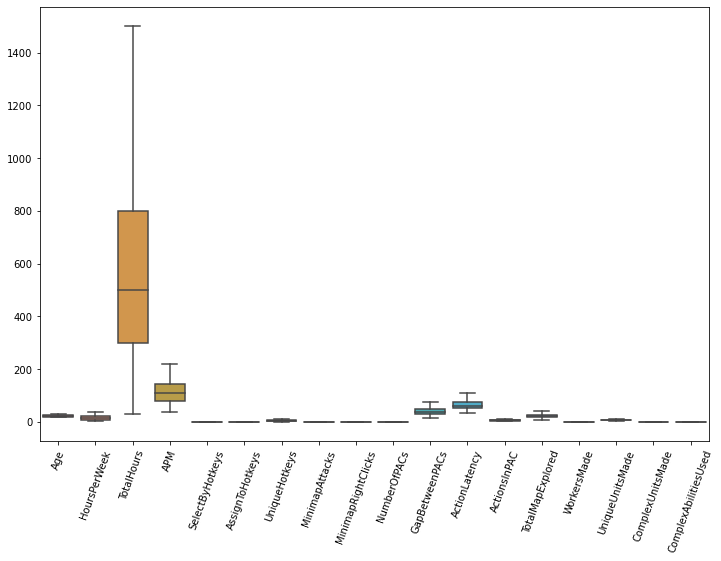

In [8]:
#Se verifica que no hay más outliers
fig=plt.figure(figsize=(12,8))
ax = sns.boxplot(data=df_limpio2[df_limpio2.columns])
d = ax.set_xticklabels(ax.get_xticklabels(),rotation = 70)

Ahora, se junta nuevamente con la variable objetivo para normalizar

In [9]:
df_limpio.reset_index(drop=True, inplace=True)
df_limpio2.reset_index(drop=True, inplace=True)

In [11]:
df_obj = pd.DataFrame(df_limpio["LeagueIndex"], columns=["LeagueIndex"])
df_limpio3 = pd.concat([df_obj,df_limpio2], axis=1)
df_limpio3

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,6.429631,27.0,10.0,1500.0,143.7180,0.003515,0.000220,7.0,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28.0,0.001397,6.0,0.0,0.000000
1,6.034862,23.0,10.0,1500.0,129.2322,0.003304,0.000259,4.0,0.000270,0.000432,0.004307,32.9194,42.3454,4.8434,22.0,0.001193,5.0,0.0,0.000208
2,5.000659,30.0,10.0,200.0,69.9612,0.001101,0.000336,4.0,0.000270,0.000461,0.002926,44.6475,75.3548,4.0430,22.0,0.000745,6.0,0.0,0.000189
3,3.264122,19.0,20.0,400.0,107.6016,0.001034,0.000213,1.0,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19.0,0.000426,7.0,0.0,0.000384
4,3.883553,30.0,10.0,500.0,122.8908,0.001136,0.000327,2.0,0.000000,0.001018,0.002368,22.6885,62.0813,8.4338,15.0,0.001174,4.0,0.0,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117,4.893551,20.0,8.0,400.0,158.1390,0.009892,0.000504,7.0,0.000217,0.000313,0.003583,36.3990,66.2718,4.5097,30.0,0.001035,7.0,0.0,0.000287
3118,6.030737,16.0,36.0,1500.0,186.1320,0.006951,0.000360,6.0,0.000083,0.000166,0.005414,22.8615,34.7417,4.9309,38.0,0.001343,7.0,0.0,0.000388
3119,6.252857,21.0,8.0,100.0,121.6992,0.002956,0.000241,8.0,0.000055,0.000208,0.003690,35.5833,57.9585,5.4154,23.0,0.002014,7.0,0.0,0.000000
3120,3.985869,20.0,28.0,400.0,134.2848,0.005424,0.000182,5.0,0.000000,0.000480,0.003205,18.2927,62.4615,6.0202,18.0,0.000934,5.0,0.0,0.000000


### Normalización de variables

Como las variables presentadas manejan una escala diferente es necesario aplicar normalización. Para esto se usa MinMaxScaler

In [12]:
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_limpio3), columns=df_limpio3.columns)

df_norm

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,0.642963,0.785714,0.235294,1.000000,0.583657,0.353034,0.226641,0.7,0.406782,0.385283,0.794399,0.286740,0.113512,0.355172,0.62500,0.629061,0.375,0.0,0.000000
1,0.603486,0.500000,0.235294,1.000000,0.504987,0.331590,0.274004,0.4,1.000000,0.424683,0.666068,0.290946,0.133168,0.371385,0.43750,0.513049,0.250,0.0,0.453091
2,0.500066,1.000000,0.235294,0.115646,0.183098,0.108103,0.364657,0.4,1.000000,0.453137,0.338995,0.486894,0.572135,0.231249,0.43750,0.256607,0.375,0.0,0.412032
3,0.326412,0.214286,0.529412,0.251701,0.387515,0.101250,0.218784,0.1,0.197285,0.533667,0.541871,0.229143,0.284633,0.384008,0.34375,0.074765,0.500,0.0,0.837292
4,0.388355,1.000000,0.235294,0.319728,0.470548,0.111647,0.354837,0.2,0.000000,1.000000,0.206998,0.120012,0.395621,1.000000,0.21875,0.502196,0.125,0.0,0.042028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117,0.489355,0.285714,0.176471,0.251701,0.661974,1.000000,0.565834,0.7,0.805220,0.307506,0.494735,0.349081,0.451347,0.312960,0.68750,0.422513,0.500,0.0,0.626539
3118,0.603074,0.000000,1.000000,1.000000,0.813999,0.701592,0.393745,0.6,0.307636,0.163171,0.928105,0.122903,0.032053,0.386704,0.93750,0.598444,0.500,0.0,0.846241
3119,0.625286,0.357143,0.176471,0.047619,0.464077,0.296300,0.251846,0.8,0.202710,0.204285,0.519841,0.335453,0.340795,0.471532,0.46875,0.982007,0.500,0.0,0.000000
3120,0.398587,0.285714,0.764706,0.251701,0.532427,0.546653,0.181321,0.5,0.000000,0.471464,0.405068,0.046569,0.400677,0.577421,0.31250,0.364930,0.250,0.0,0.000000


## 2. Identificación de variables

Buscamos cuáles variables tienen relación con *LeagueIndex*

En primer lugar se utilizan gráficos de dispersión

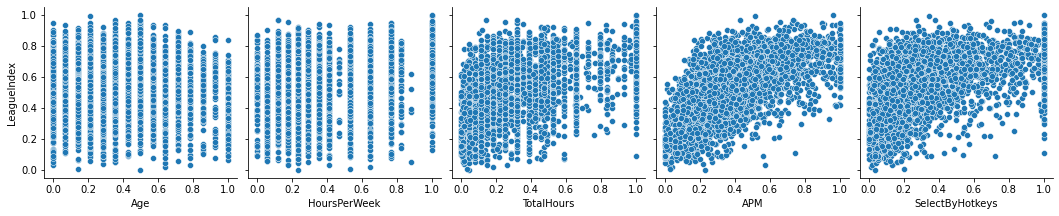

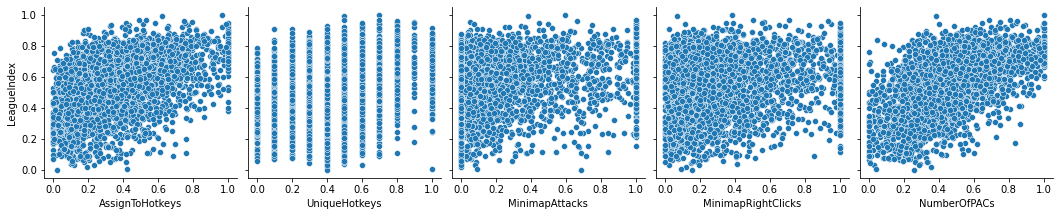

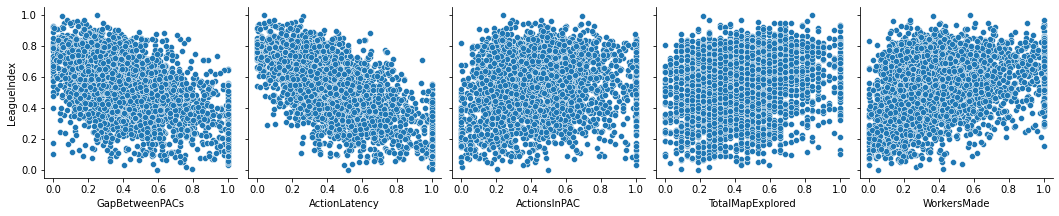

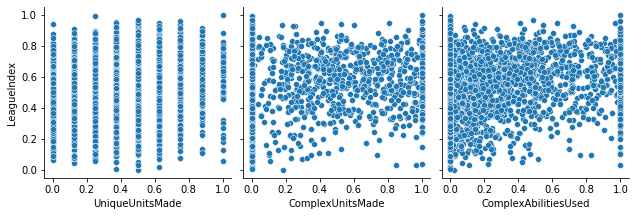

In [13]:
sns.pairplot(df_norm, height=3, y_vars = 'LeagueIndex', x_vars = df_norm.columns[1:6], kind='scatter')
sns.pairplot(df_norm, height=3, y_vars = 'LeagueIndex', x_vars = df_norm.columns[6:11], kind='scatter')
sns.pairplot(df_norm, height=3, y_vars = 'LeagueIndex', x_vars = df_norm.columns[11:16], kind='scatter')
sns.pairplot(df_norm, height=3, y_vars = 'LeagueIndex', x_vars = df_norm.columns[16:], kind='scatter')

De las graficas anteriores vemos que unos buenos candidatos son:
* TotalHours
* APM
* SelectByHotKeys
* AssignToHotKeys
* NumberOfPACs
* GapBetweenPACs
* ActionLatency

Ahora, se verificarán las relaciones usando una matriz de corrrelaciones

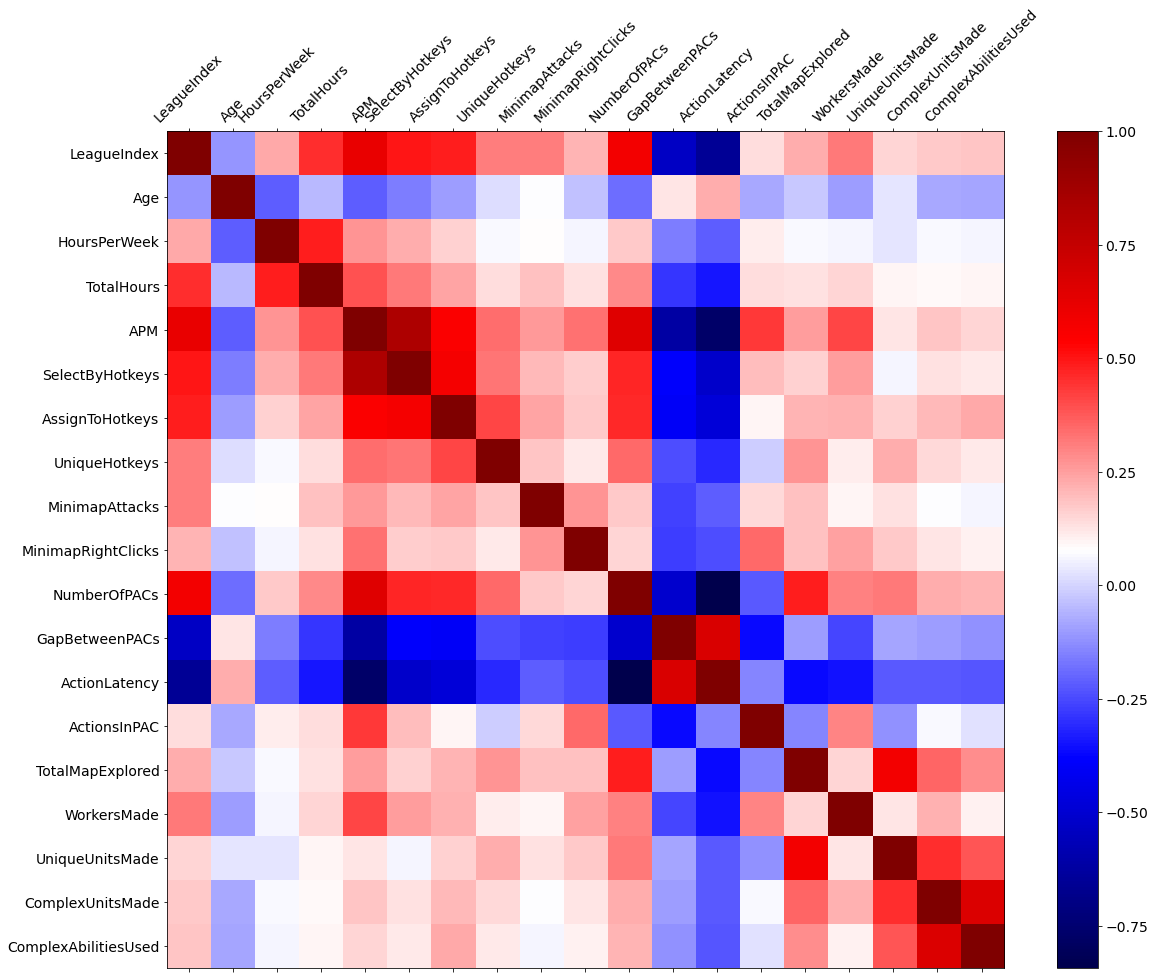

In [14]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_norm.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(df_norm.select_dtypes(['number']).shape[1]), df_norm.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_norm.select_dtypes(['number']).shape[1]), df_norm.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)


Verificamos que los candidatos seleccionados sí tienen una correlación mayor que el resto de variables

## 3. Modelo de regresión

Se crea el modelo de regresión lineal con las variables solicitadas

In [15]:
# Preprocesamiento
# Se usa un transformador para seleccionar unicamente las columnas que se quieren usar
selected_cols = ['TotalHours','APM','SelectByHotkeys','AssignToHotkeys', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency']

pre = [('initial',ColumnTransformer([("selector", 'passthrough',selected_cols)])),]

In [16]:
# Modelo
model = [('model', LinearRegression())]

In [17]:
# Decalra el pipeline
pipeline = Pipeline(pre+model)

In [18]:
# Extraemos las variables explicativas y objetivo para entrenar
Y = df_norm['LeagueIndex']
X = df_norm.drop('LeagueIndex', axis = 1)

pipeline = pipeline.fit(X,Y)

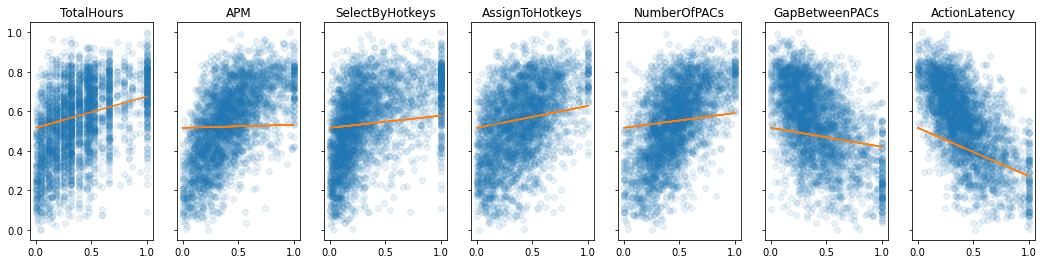

In [19]:
# Visualizamos la regresion lineal en cada dimension
f, axs = plt.subplots(1, len(selected_cols), sharey=True, figsize = (18,4))

for i in range(len(selected_cols)):

    pos_col = i
    col = selected_cols[pos_col]

    # Variable x
    x = X[col]
    # Pendiente
    m = pipeline['model'].coef_[pos_col]
    # Interceto
    b = pipeline['model'].intercept_

    axs[i].plot(x, Y, 'o', alpha = 0.1)
    axs[i].plot(x, x*m + b)
    axs[i].set_title(col)


In [20]:
pipeline['model'].coef_

array([ 0.15929791,  0.01550315,  0.06167175,  0.11078287,  0.07487103,
       -0.09596032, -0.24479904])

## 4. Validación de supuestos

### 4.1 Colinealidad

In [ ]:
df_temp = df_norm[selected_cols]


f = plt.figure(figsize=(10, 10))
plt.matshow(df_temp.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(df_temp.select_dtypes(['number']).shape[1]), df_temp.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_temp.select_dtypes(['number']).shape[1]), df_temp.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)

### 4.2 Linealidad

In [ ]:
#Horas
sns.pairplot(df_norm, height=2, aspect = 3, y_vars = 'LeagueIndex', x_vars = ['TotalHours','APM','SelectByHotkeys','AssignToHotkeys', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency'], kind='scatter', plot_kws = {'alpha':0.2})

In [ ]:
#Revisiones Hora
# Creamos la variable
X = df_norm[['TotalHours']].copy()
X['TH_2'] = X['TotalHours']**2

# columna
col = 'TH_2'

pre = [('initial',ColumnTransformer([("selector", 'passthrough',[col])])),
       ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
       ('scaler', MinMaxScaler())]

model = [('model', LinearRegression())]

p_temp = Pipeline(pre+model)

p_temp = p_temp.fit(X,Y)
print(f"{col}: {p_temp.score(X,Y)}")

corr_test = pearsonr(x = df_norm['TotalHours'], y = df_norm['LeagueIndex'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])
sns.regplot(df_norm['TotalHours'], y = df_norm['LeagueIndex'], data=df_norm);

In [ ]:
#Revisiones APM
# Creamos la variable
X = df_norm[['APM']].copy()
X['APM_2'] = X['APM']**2

# columna
col = 'APM_2'

pre = [('initial',ColumnTransformer([("selector", 'passthrough',[col])])),
       ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
       ('scaler', MinMaxScaler())]

model = [('model', LinearRegression())]

p_temp = Pipeline(pre+model)

p_temp = p_temp.fit(X,Y)

print(f"{col}: {p_temp.score(X,Y)}")
corr_test = pearsonr(x = df_norm['APM'], y = df_norm['LeagueIndex'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])
sns.regplot(df_norm['APM'], y = df_norm['LeagueIndex'], data=df_norm);

In [ ]:
#Revisiones selected by hot keys
# Creamos la variable
X = df_norm[['SelectByHotkeys']].copy()
X['SBHK_2'] = X['SelectByHotkeys']**2

# columna
col = 'SBHK_2'

pre = [('initial',ColumnTransformer([("selector", 'passthrough',[col])])),
       ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
       ('scaler', MinMaxScaler())]

model = [('model', LinearRegression())]

p_temp = Pipeline(pre+model)

p_temp = p_temp.fit(X,Y)

print(f"{col}: {p_temp.score(X,Y)}")
corr_test = pearsonr(x = df_norm['SelectByHotkeys'], y = df_norm['LeagueIndex'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])
sns.regplot(df_norm['SelectByHotkeys'], y = df_norm['LeagueIndex'], data=df_norm);

In [ ]:
#Revisiones ATHK
# Creamos la variable
X = df_norm[['AssignToHotkeys']].copy()
X['AssignToHotkeys_2'] = X['AssignToHotkeys']**2

# columna
col = 'AssignToHotkeys_2'

pre = [('initial',ColumnTransformer([("selector", 'passthrough',[col])])),
       ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
       ('scaler', MinMaxScaler())]

model = [('model', LinearRegression())]

p_temp = Pipeline(pre+model)

p_temp = p_temp.fit(X,Y)

print(f"{col}: {p_temp.score(X,Y)}")
corr_test = pearsonr(x = df_norm['AssignToHotkeys'], y = df_norm['LeagueIndex'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])
sns.regplot(df_norm['AssignToHotkeys'], y = df_norm['LeagueIndex'], data=df_norm);

In [ ]:
#Revisiones number of PACS
# Creamos la variable
X = df_norm[['NumberOfPACs']].copy()
X['NumberOfPACs_2'] = X['NumberOfPACs']**2

# columna
col = 'NumberOfPACs_2'

pre = [('initial',ColumnTransformer([("selector", 'passthrough',[col])])),
       ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
       ('scaler', MinMaxScaler())]

model = [('model', LinearRegression())]

p_temp = Pipeline(pre+model)

p_temp = p_temp.fit(X,Y)

print(f"{col}: {p_temp.score(X,Y)}")
corr_test = pearsonr(x = df_norm['NumberOfPACs'], y = df_norm['LeagueIndex'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])
sns.regplot(df_norm['NumberOfPACs'], y = df_norm['LeagueIndex'], data=df_norm);

In [ ]:
#Revisiones ATHK
# Creamos la variable
X = df_norm[[ 'GapBetweenPACs']].copy()
X[ 'GapBetweenPACs_2'] = X[ 'GapBetweenPACs']**2

# columna
col = 'GapBetweenPACs_2'

pre = [('initial',ColumnTransformer([("selector", 'passthrough',[col])])),
       ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
       ('scaler', MinMaxScaler())]

model = [('model', LinearRegression())]

p_temp = Pipeline(pre+model)

p_temp = p_temp.fit(X,Y)

print(f"{col}: {p_temp.score(X,Y)}")
corr_test = pearsonr(x = df_norm['GapBetweenPACs'], y = df_norm['LeagueIndex'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])
sns.regplot(df_norm['GapBetweenPACs'], y = df_norm['LeagueIndex'], data=df_norm);

In [ ]:
#Revisiones action
# Creamos la variable
X = df_norm[[ 'ActionLatency']].copy()
X['ActionLatency_2'] = X['ActionLatency']**2

# columna
col = 'ActionLatency_2'

pre = [('initial',ColumnTransformer([("selector", 'passthrough',[col])])),
       ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
       ('scaler', MinMaxScaler())]

model = [('model', LinearRegression())]

p_temp = Pipeline(pre+model)

p_temp = p_temp.fit(X,Y)

print(f"{col}: {p_temp.score(X,Y)}")
corr_test = pearsonr(x = df_norm['ActionLatency'], y = df_norm['LeagueIndex'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])
sns.regplot(df_norm['ActionLatency'], y = df_norm['LeagueIndex'], data=df_norm);

### 4.3 Normalidad en los errores 

In [ ]:
X = df_norm.drop('LeagueIndex', axis = 1)
Y = df_norm['LeagueIndex']

# Calculamos los errores
errors = (p2.predict(X) - y).values

fig, axes = plt.subplots(1, 2, figsize = (12,4))

# Dispersión
sns.scatterplot(x = p2.predict(X), y = errors, alpha = 0.1, ax = axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

In [ ]:
# Diagrama de caja
fig=plt.figure(figsize=(12,4))
ax = sns.boxplot(data= df_norm[['LeagueIndex']], orient="h")

## 5. Métricas del modelo 

R^2

In [ ]:
p2.score(X,Y)

In [ ]:
y_true = Y
y_predicted = p2.predict(X)

# Note que hay que sacarle la raiz al valor
np.sqrt(mse(y_true, y_predicted))